In [4]:
%matplotlib inline

import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LightSource
from mintpy.defaults.plot import *
from mintpy.utils import readfile, utils as ut

work_dir = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/volcano_setting')
os.chdir(work_dir)
print('Go to directory', work_dir)

dem_file = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/data/gsi10m.dem.wgs84')
atr = readfile.read_attribute(dem_file)
coord = ut.coordinate(atr)

Go to directory /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/volcano_setting


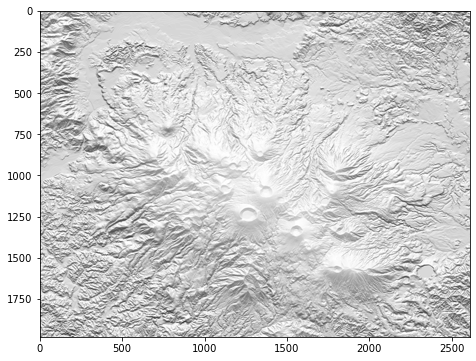

In [7]:
# prepare shaded relief
lat0, lat1 = 31.84, 32.06
lon0, lon1 = 130.71, 131.0
geo_box = (lon0, lat0, lon1, lat1)
pix_box = coord.bbox_geo2radar(geo_box)
dem = readfile.read(dem_file, box=pix_box)[0]
ls = LightSource(azdeg=0, altdeg=45)
dem_shade = ls.shade(dem, vert_exag=0.3, cmap=plt.get_cmap('gray'), vmin=-2000, vmax=2000)
dem_shade[np.isnan(dem_shade[:, :, 0])] = np.nan

# plot
fig, ax = plt.subplots(figsize=[8, 6])
ax.imshow(dem_shade, interpolation='spline16', origin='upper')
plt.show()

In [ ]:
# insert location map
ax2 = fig.add_axes([0.554, 0.717, 0.3, 0.2])
geo_box_loc = (-93, 4, -75, -6)  # WNES
m = pp.BasemapExt(llcrnrlon=geo_box_loc[0], llcrnrlat=geo_box_loc[3],
                  urcrnrlon=geo_box_loc[2], urcrnrlat=geo_box_loc[1],
                  projection='cyl', resolution='h', suppress_ticks=False, ax=ax2)
m.fillcontinents(color='lightgray')
m.drawcountries()
m.drawcoastlines(linewidth=0.5)
m.draw_lalo_label(geo_box_loc, ax=ax2, lalo_step=[5, 10], lalo_loc=[0, 1, 1, 0], xoffset=-3.6, yoffset=-2.8, font_size=font_size)
# plot AOI box
ax2.plot([W, E, E, W, W], [N, N, S, S, N], linewidth=0.5, color='k')